## Análisis de datos Melbourne

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv('../../dataset/melbourne.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
# Comentado porque ya está ejecutado y no se necesita
df = pd.read_csv('../../dataset/melbourne.csv')
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile

### Precios Melbourne

In [4]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [5]:
%matplotlib inline

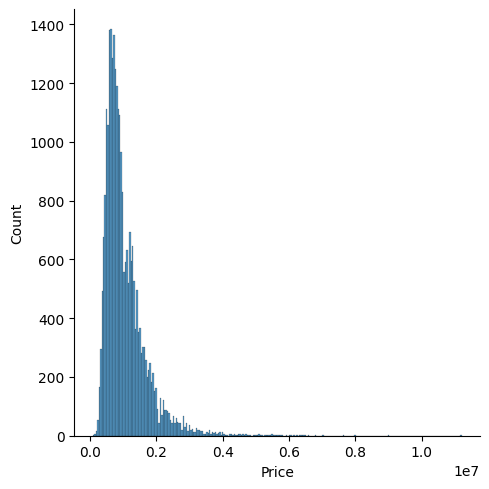

In [6]:
sns.displot(data=df, x='Price')
plt.show()

(0.0, 4000000.0)

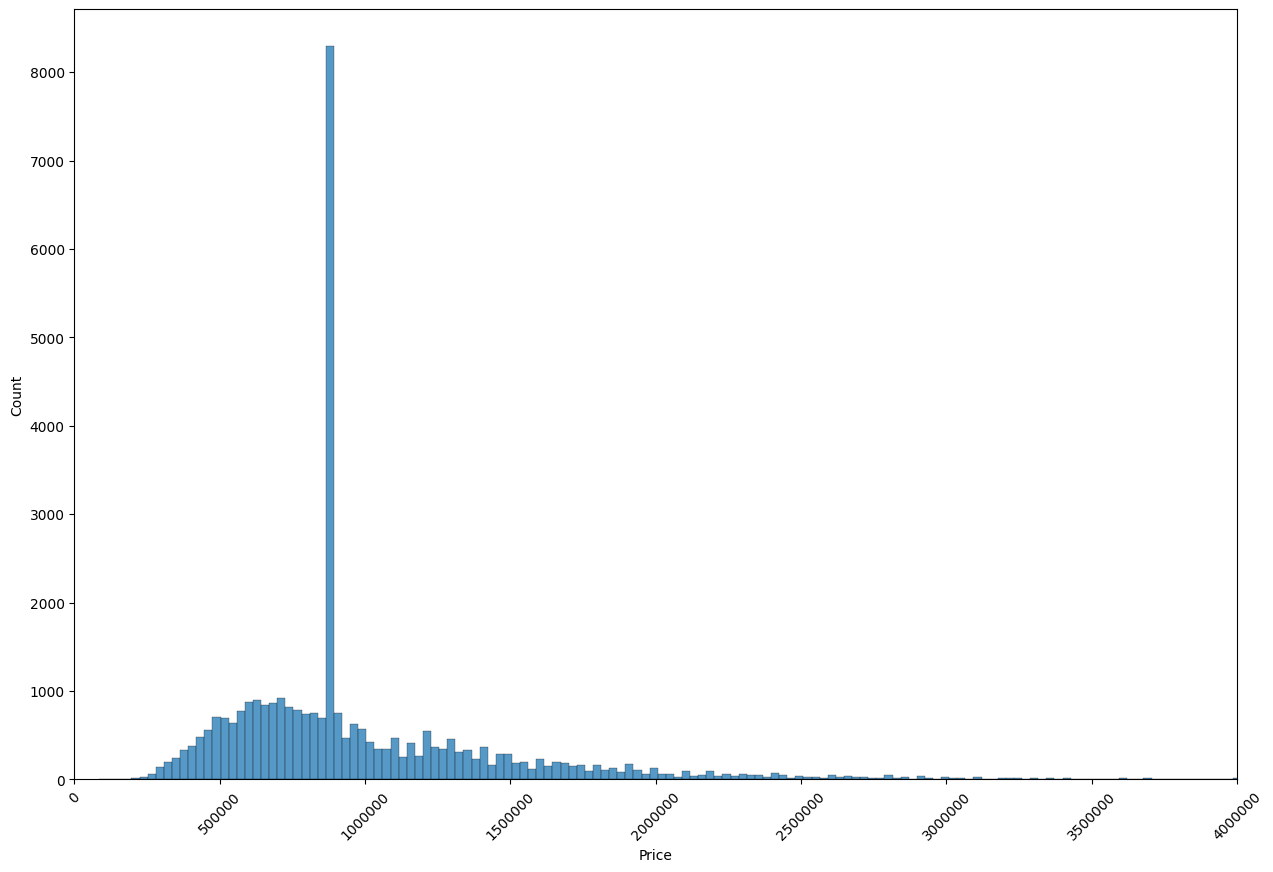

In [7]:
plt.figure(figsize=(15, 10))
df['Price'].fillna(df['Price'].median(), inplace=True)
sns.histplot(data=df, x='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45) 
plt.xlim(0, 4000000)                    

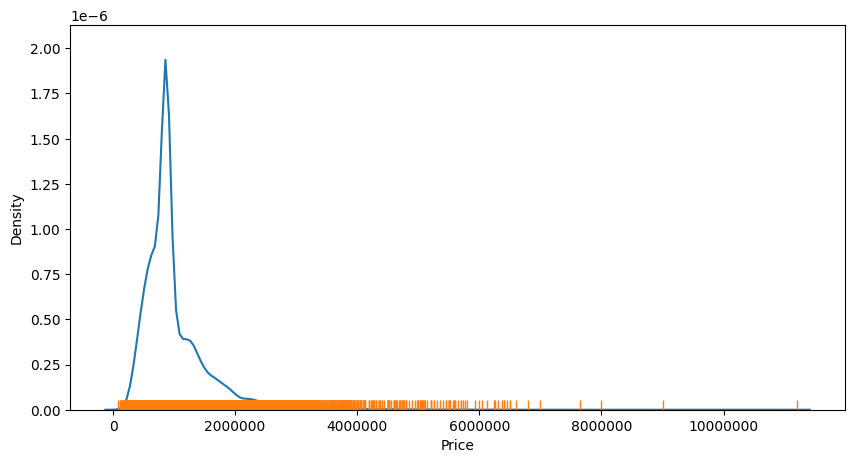

In [8]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='Price')
sns.rugplot(data=df, x='Price')
plt.ticklabel_format(style='plain', axis='x')



<Axes: xlabel='Bathroom', ylabel='count'>

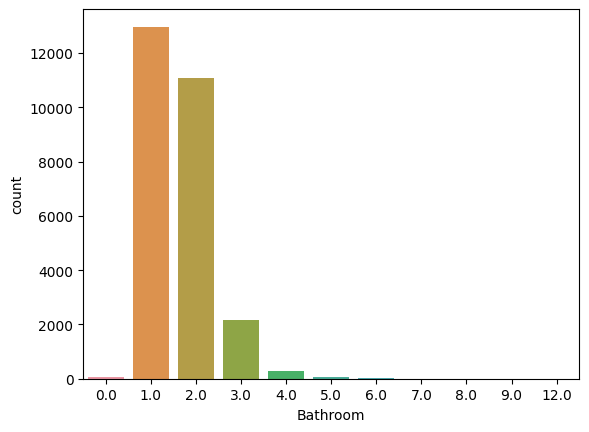

In [9]:
sns.countplot(data=df, x='Bathroom')


<Axes: xlabel='Bedroom2', ylabel='count'>

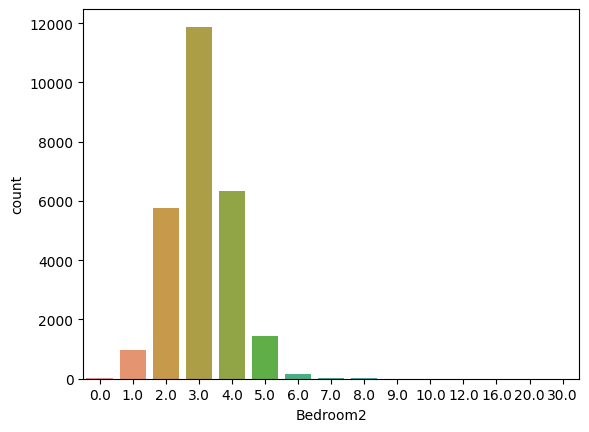

In [10]:
sns.countplot(data=df, x='Bedroom2')

### Calcular nulos en cada columna

In [11]:
def calc_missing(df):
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    #for col in df.columns:
    #   if df[col].isnul().sum() > 0
    #      missing_columns.append(col)
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        total_count = df.shape[0]
        null_percent = (null_count / total_count) * 100
        
        print(f"{col} {null_count} / {total_count} = {null_percent:.2f} %")
calc_missing(df)

Distance 1 / 34857 = 0.00 %
Postcode 1 / 34857 = 0.00 %
Bedroom2 8217 / 34857 = 23.57 %
Bathroom 8226 / 34857 = 23.60 %
Car 8728 / 34857 = 25.04 %
Landsize 11810 / 34857 = 33.88 %
BuildingArea 21115 / 34857 = 60.58 %
YearBuilt 19306 / 34857 = 55.39 %
CouncilArea 3 / 34857 = 0.01 %
Lattitude 7976 / 34857 = 22.88 %
Longtitude 7976 / 34857 = 22.88 %
Regionname 3 / 34857 = 0.01 %
Propertycount 3 / 34857 = 0.01 %


<Axes: xlabel='BuildingArea'>

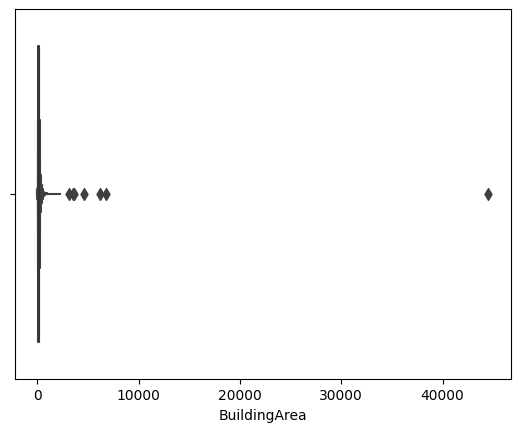

In [12]:
sns.boxenplot(data=df, x='BuildingArea')

<Axes: xlabel='BuildingArea'>

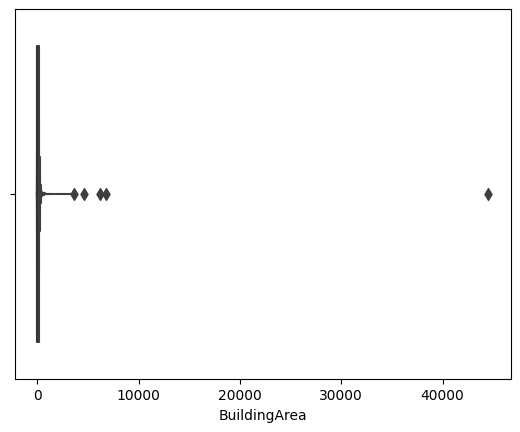

In [13]:
df['BuildingArea'].fillna(0, inplace=True)
sns.boxenplot(data=df, x='BuildingArea')

<Axes: xlabel='Bedroom2'>

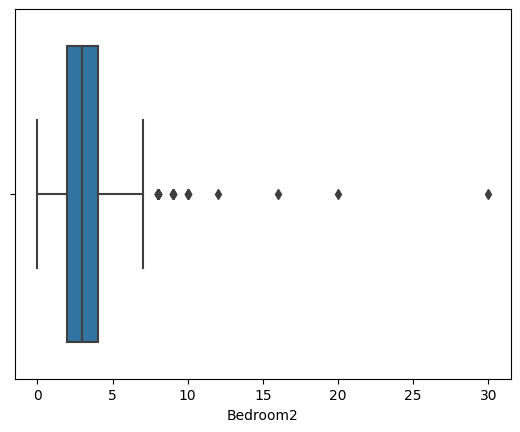

In [14]:
sns.boxplot(data=df, x='Bedroom2')

### Borrar columnas

In [15]:
# Borrar columna Bedroom
df.drop('Bedroom2', axis=1, inplace=True)

In [16]:
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,3/09/2016,2.5,3067.0,1.0,1.0,126.0,0.0,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,0.0,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,4/02/2016,2.5,3067.0,2.0,1.0,0.0,0.0,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [17]:
#Rellenar Bedroom2 con la mediana de filas similares segun las columnas mas correlacionadas
# sns.countplot(data=df, x='Bedroom2')
# df['Bedroom2'].fillna(df['Bedroom2'].mode()[0], inplace=True)

### Correlaciones

C:\Users\bardo\AppData\Local\Temp\ipykernel_6908\3210355038.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


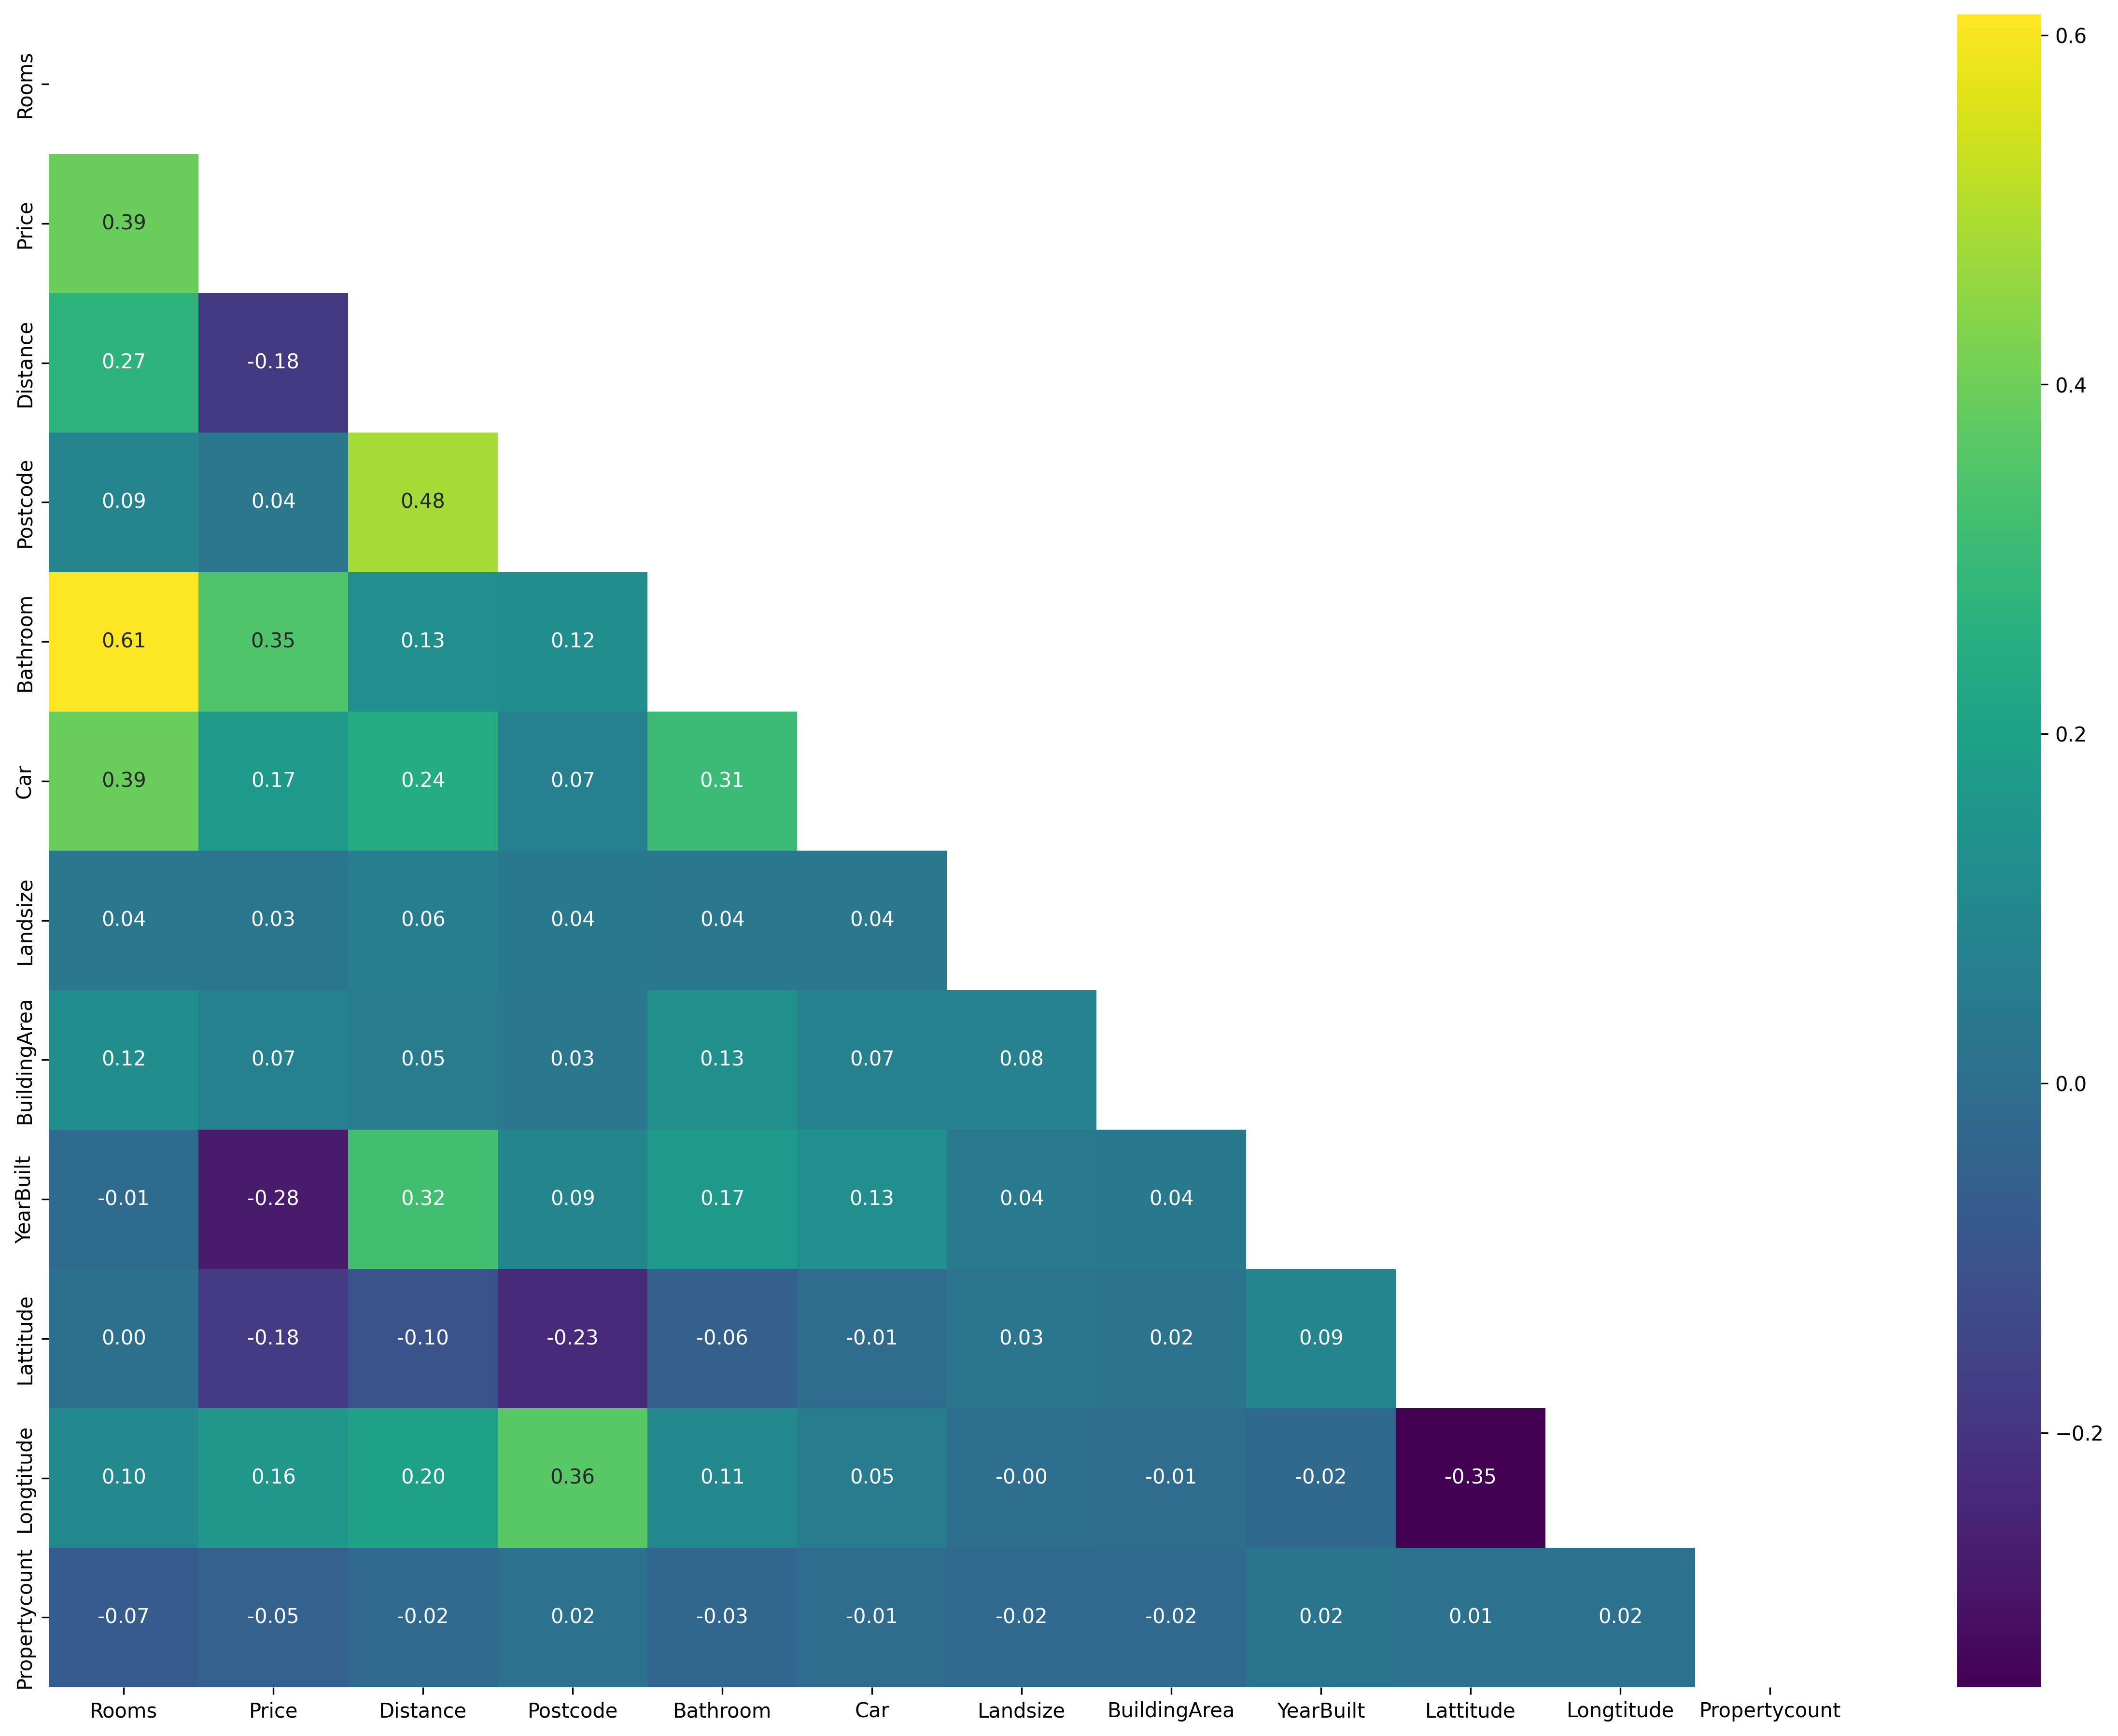

In [18]:
import numpy as np
plt.figure(figsize=(20,15), dpi=300)
df_corr = df.corr()
filter = np.triu(df_corr)
sns.heatmap(df_corr,annot=True, cmap='viridis', mask= filter, fmt='.2f'); 

### Análisis bivariante

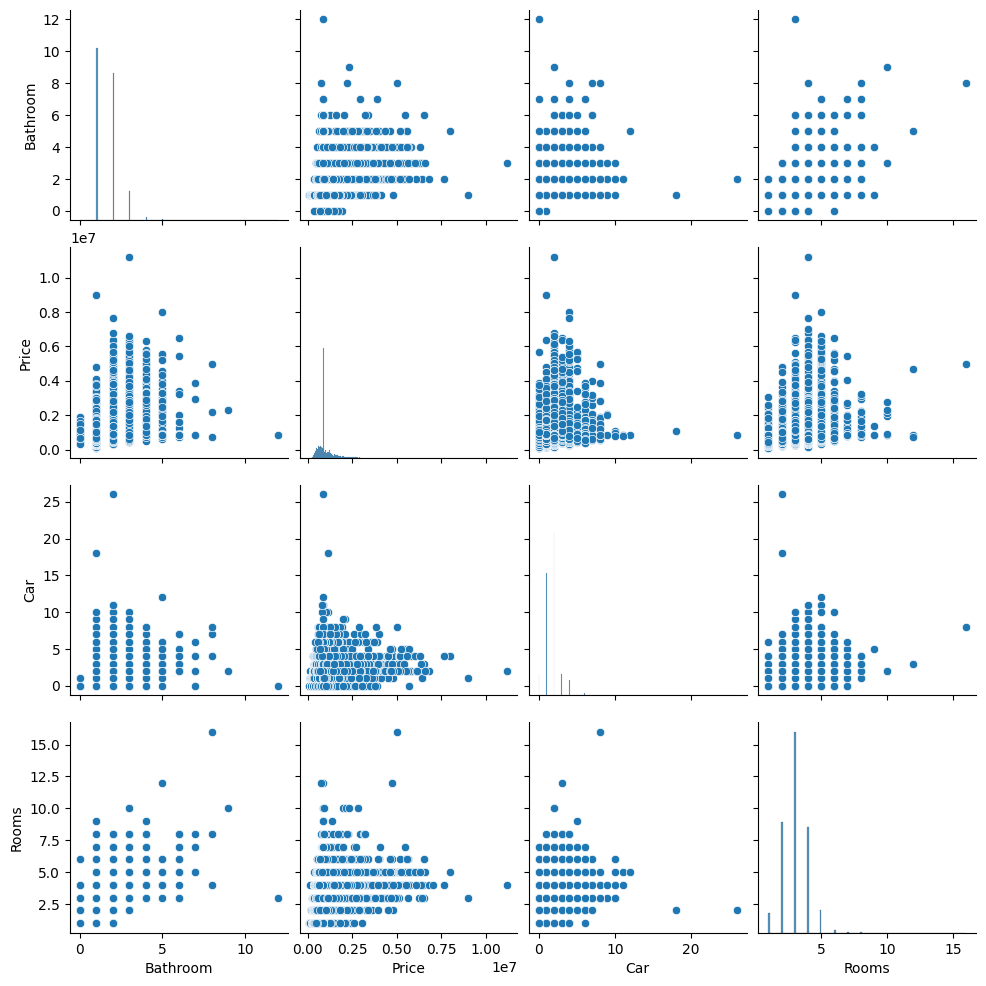

In [19]:
# Bathroom con: Rooms, Price, Car
sns.pairplot(df[['Bathroom', 'Price', 'Car', 'Rooms']])


<Axes: xlabel='Bathroom', ylabel='Price'>

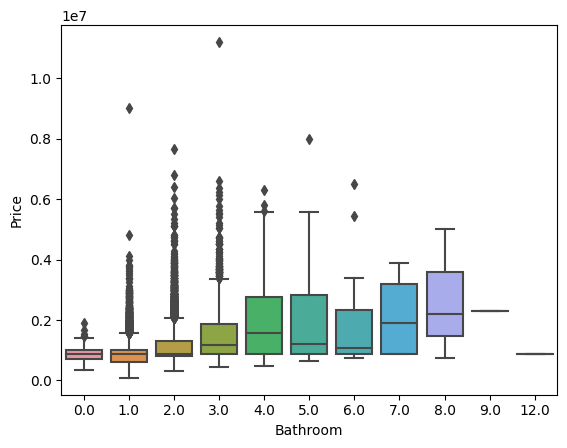

In [20]:
sns.boxplot(data=df, x='Bathroom', y='Price')

<Axes: xlabel='Bathroom', ylabel='Car'>

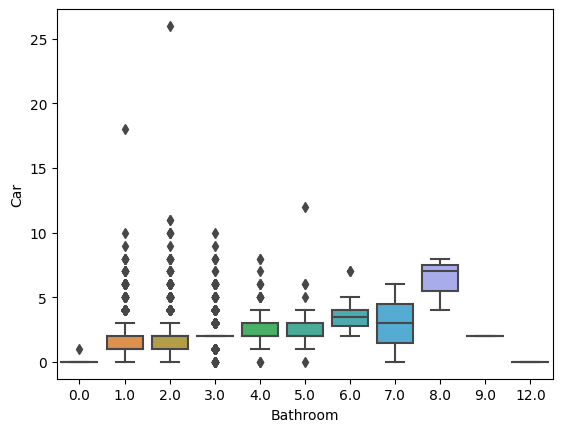

In [21]:
sns.boxplot(data=df, x='Bathroom', y='Car')

<Axes: xlabel='Bathroom', ylabel='Rooms'>

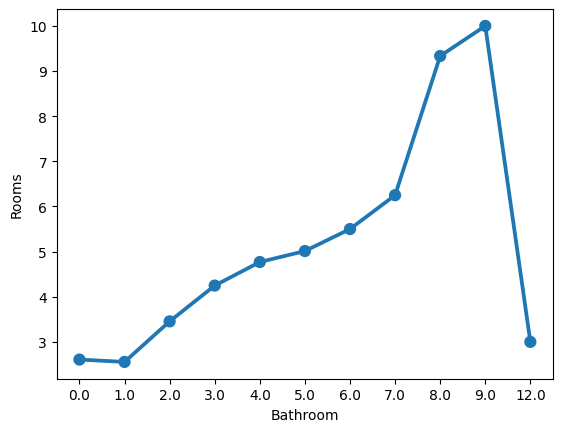

In [22]:
sns.pointplot(data=df, x='Bathroom', y='Rooms', errorbar=None)

<Axes: xlabel='Bathroom', ylabel='Price'>

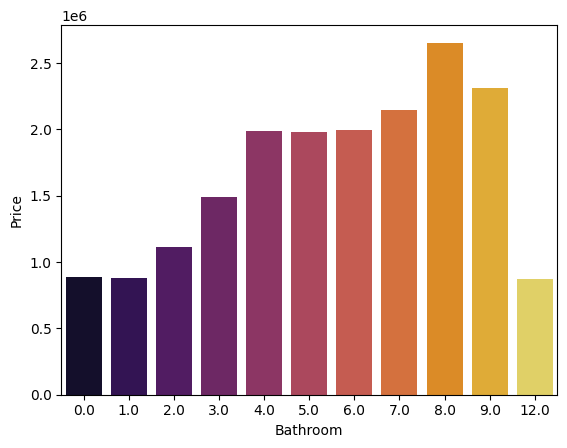

In [23]:
sns.barplot(data=df, x='Bathroom', y='Price', errorbar=None, palette='inferno')

<Axes: xlabel='Bathroom', ylabel='Rooms'>

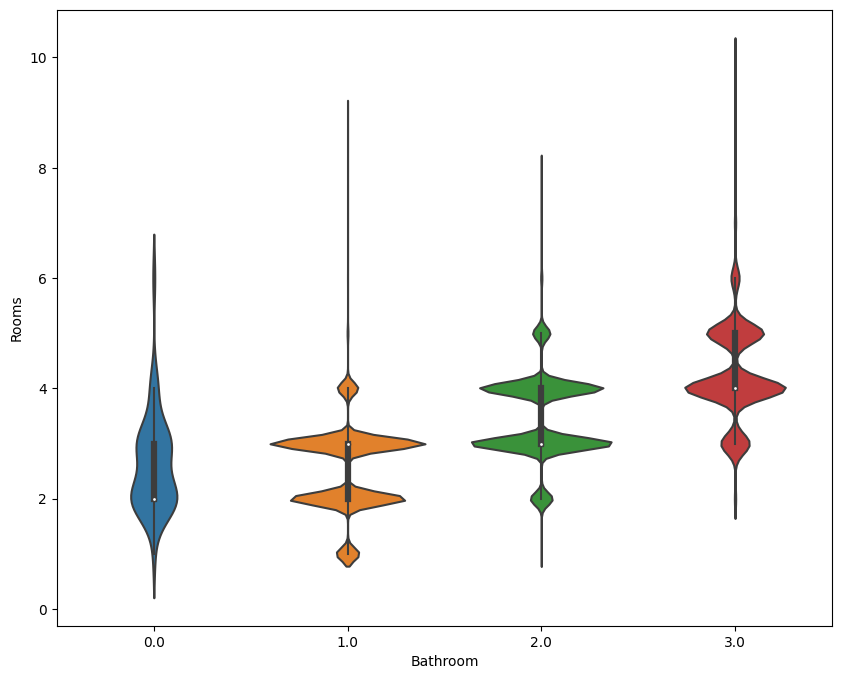

In [24]:
plt.figure(figsize=(10, 8))
filter = df['Bathroom'].between(0,3)
sns.violinplot(data=df[filter], x='Bathroom', y='Rooms')

<Axes: xlabel='Bathroom', ylabel='Price'>

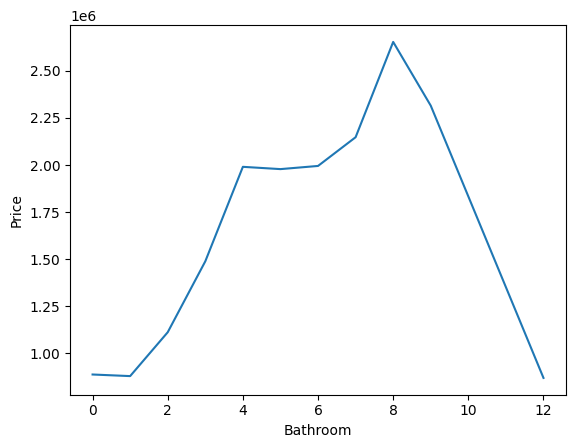

In [25]:
# calcular el precio medio por Bathroom
df_bath_price = df.groupby('Bathroom')['Price'].mean().reset_index()
sns.lineplot(data=df_bath_price, x='Bathroom', y='Price')

In [26]:
#  filtrar los que tengan mas de 8 baños
filter = df['Bathroom'] > 7
df_8_bath = df[filter]
df_8_bath.shape

(5, 20)

In [27]:
filter = df['Bathroom'] <= 7
df_8_bath = df[filter]
df_8_bath.shape

(26626, 20)

In [28]:
filter = df['Bathroom'] > 7
print(df.shape)
df.drop(df[filter].index,inplace=True)
print(df.shape)

(34857, 20)
(34852, 20)


<Axes: xlabel='Bathroom', ylabel='Price'>

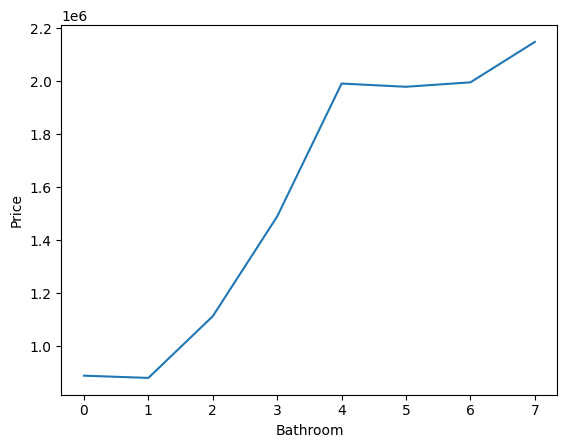

In [29]:
df_bath_price = df.groupby('Bathroom')['Price'].mean().reset_index()
sns.lineplot(data=df_bath_price, x='Bathroom', y='Price')

In [33]:
df['Bathroom'].value_counts()

1    19432
2    12531
3     2475
4      269
5       79
0       46
6       16
7        4
Name: Bathroom, dtype: int64

### Rellenar valores faltantes

In [34]:
# imputar valores nulos en Bathroom basandonos en la columna Rooms por se la mas correlacionada
filter1 = df['Bathroom'].isnull()


for i in df[filter1].index:
    
    filter2 = df['Rooms'] == df.loc[i]['Rooms']
    median = df['Bathroom'][filter2].median() 
    
    if not pd.isnull(median):
        df.loc[i,'Bathroom'] = median
    else:
        df.loc[i, 'Bathroom'] = df['Bathroom'].median()
    

In [35]:
df['Bathroom'] = df['Bathroom'].round().astype(int)
df['Bathroom'].value_counts()

1    19432
2    12531
3     2475
4      269
5       79
0       46
6       16
7        4
Name: Bathroom, dtype: int64

In [36]:
calc_missing(df)

Distance 1 / 34852 = 0.00 %
Postcode 1 / 34852 = 0.00 %
Car 8728 / 34852 = 25.04 %
Landsize 11809 / 34852 = 33.88 %
YearBuilt 19304 / 34852 = 55.39 %
CouncilArea 3 / 34852 = 0.01 %
Lattitude 7976 / 34852 = 22.89 %
Longtitude 7976 / 34852 = 22.89 %
Regionname 3 / 34852 = 0.01 %
Propertycount 3 / 34852 = 0.01 %


In [37]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,3/09/2016,2.5,3067.0,1,1.0,126.0,0.0,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1,1.0,202.0,0.0,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,4/02/2016,2.5,3067.0,2,1.0,0.0,0.0,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [38]:
from geopy.geocoders import Nominatim

address = '68 Studley St Abbotsford'

geolocator = Nominatim(user_agent ='MozillaFirefox')
location = geolocator.geocode(address)

print(location.latitude, location.longitude)

-37.8014257 144.9951832


<Axes: xlabel='Longtitude', ylabel='Lattitude'>

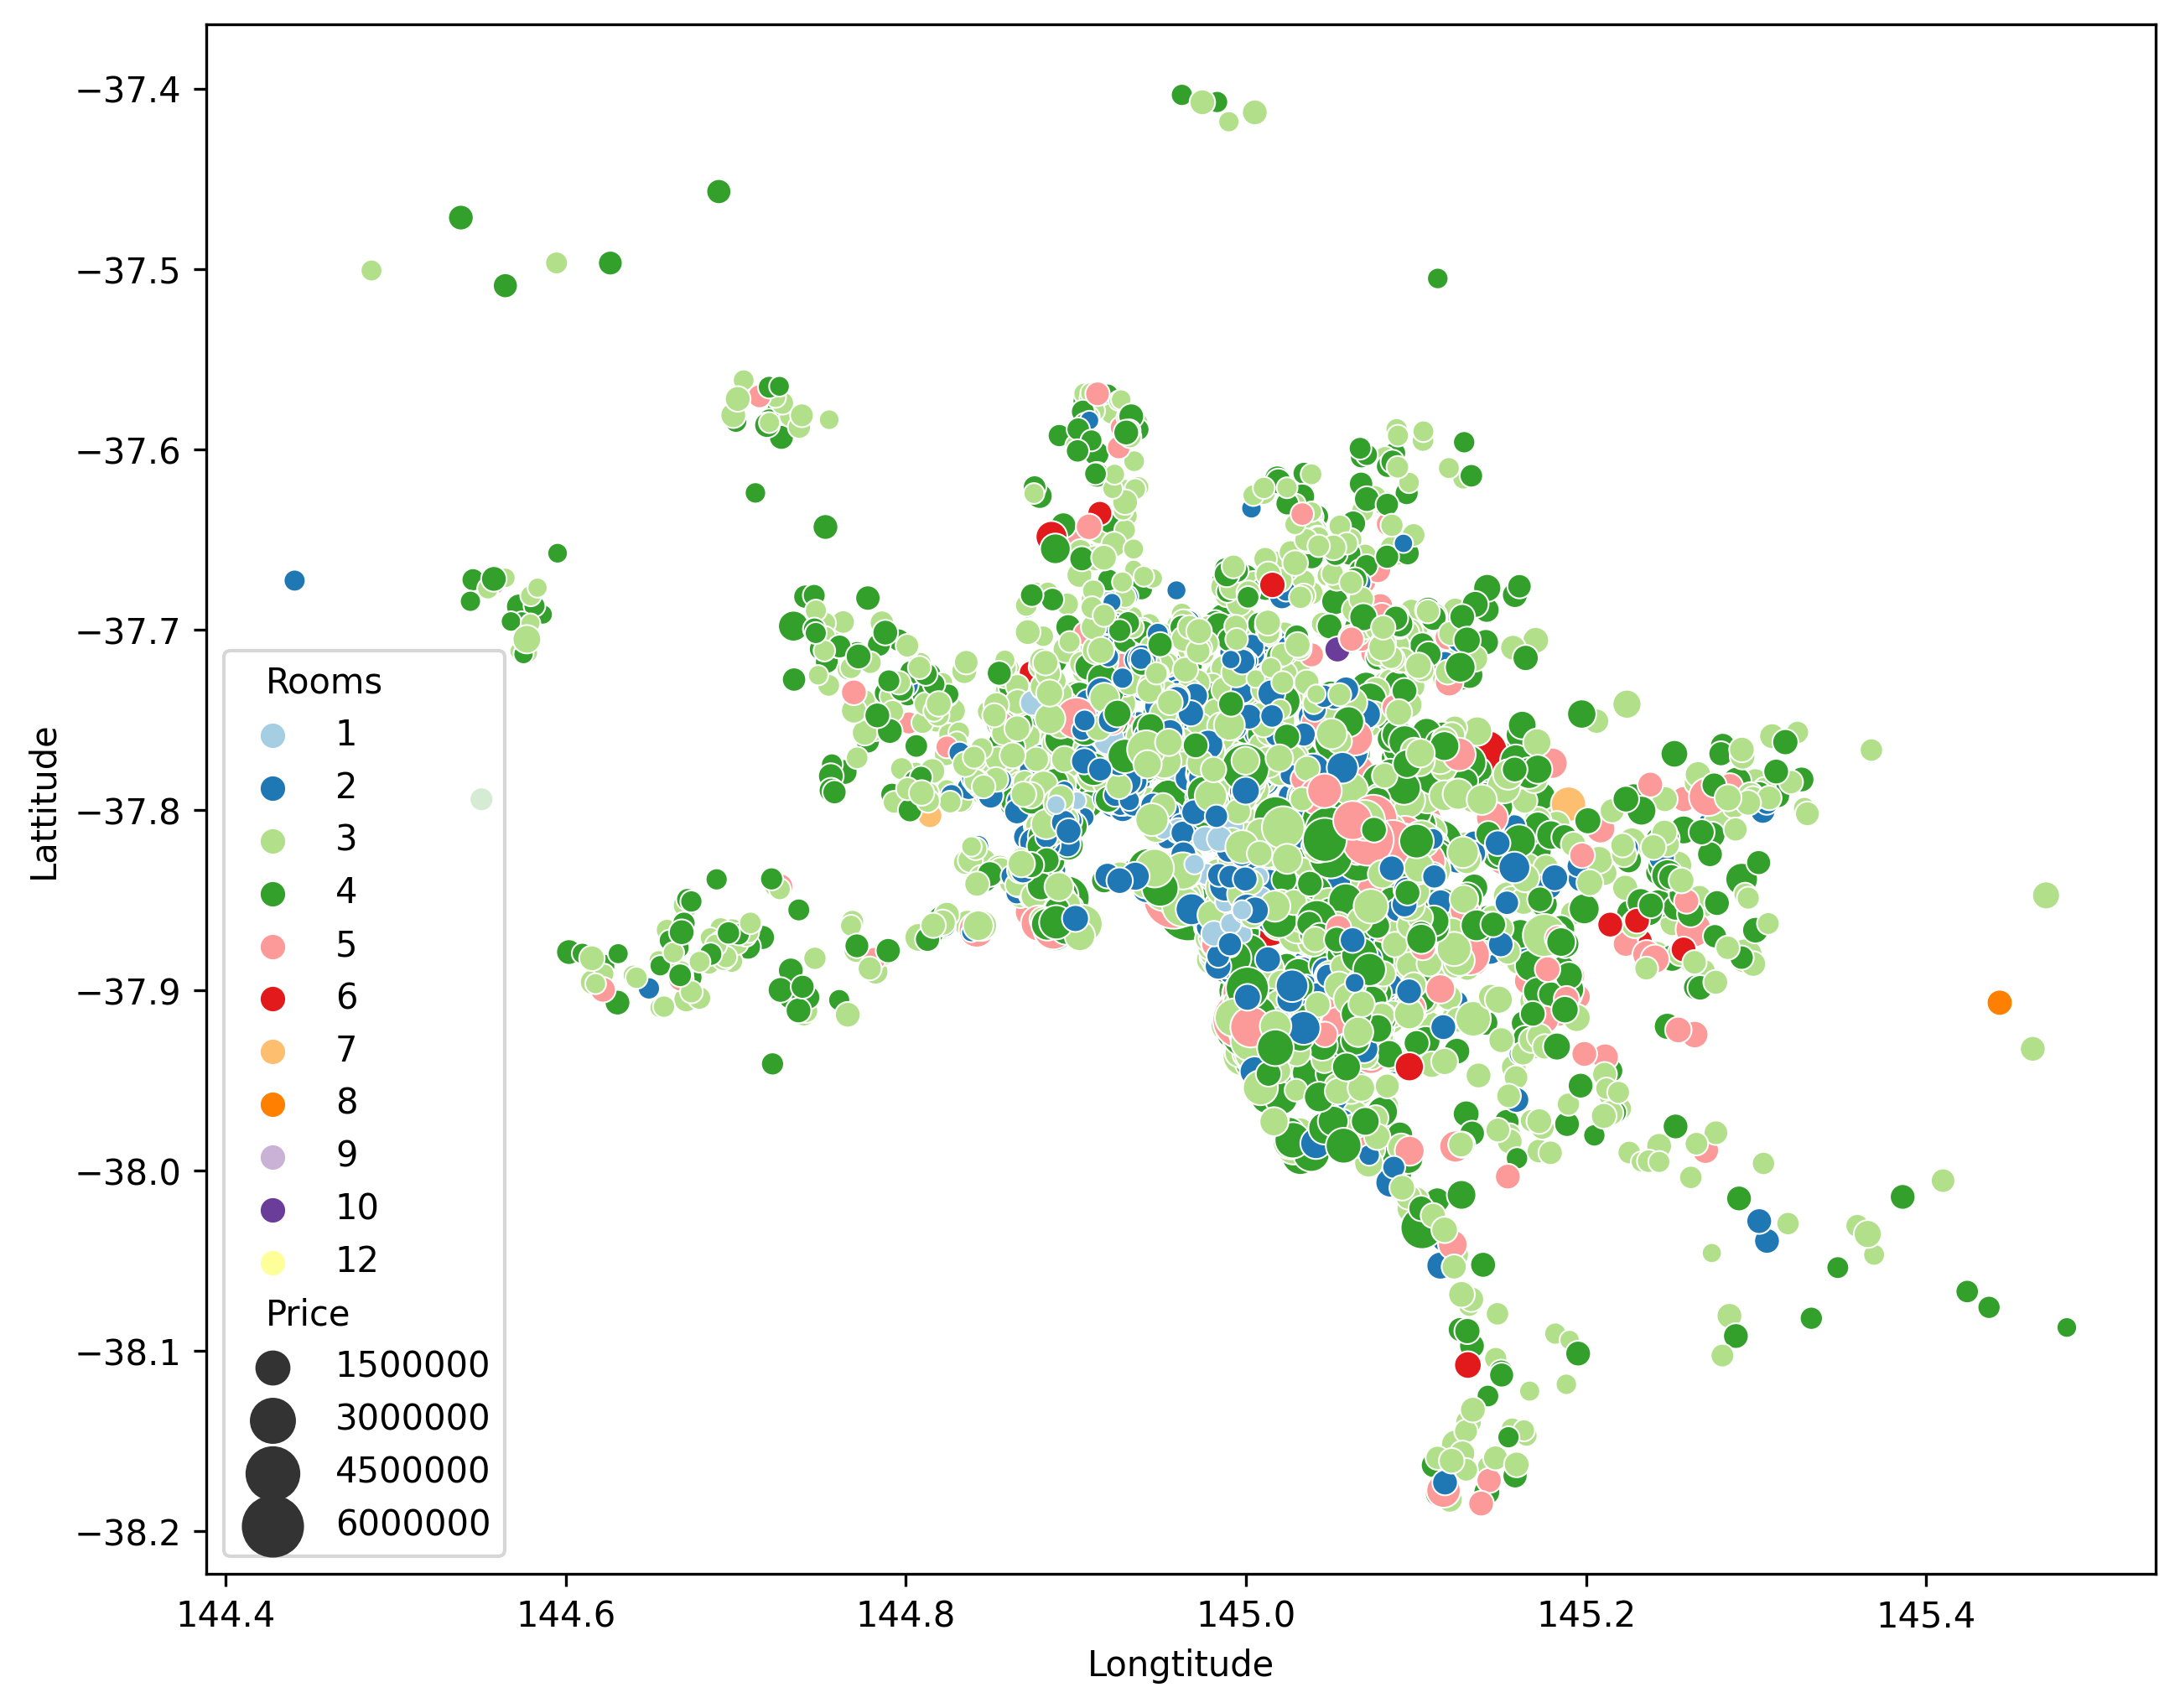

In [49]:
plt.figure(figsize=(10, 8), dpi=300)
sns.scatterplot(data=df.sample(5000), 
                x='Longtitude', y='Lattitude', hue='Rooms', palette='Paired', size='Price', sizes=(20, 300))